In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
(inp0.isna()>0).sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
inp1 = inp0[~inp0['Rating'].isna()]

In [6]:
inp1.shape

(9367, 13)

In [9]:
inp1.Rating.isna().sum()

0

In [18]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   float64
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [22]:
inp1[inp1['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
inp1 = inp1[~((inp1['Android Ver'].isna()) & (inp1['Category'] == '1.9'))]

In [24]:
inp1[inp1['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [25]:
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [26]:
inp1['Android Ver']=inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])
inp1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [27]:
inp1['Android Ver'].isna().sum()

0

In [28]:
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [29]:
inp1['Current Ver'].mode()[0]

'Varies with device'

In [30]:
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [31]:
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [32]:
inp1[inp1['Android Ver'] =='4.1 and up']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28000.0,"1,000,000+",Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000.0,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5500.0,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000.0,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,450,14000.0,"100,000+",Free,0,Everyone,Art & Design,"April 20, 2018",4.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8600.0,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7400.0,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [33]:
inp1.Price = inp1.Price.apply(lambda x: 0 if x=='0' else float(x[1:]))

In [34]:
inp1.Price.dtype

dtype('float64')

In [35]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [36]:
inp1.Price.value_counts()

0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

In [37]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [38]:
inp1.Reviews = inp1['Reviews'].astype('int')

In [39]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


In [40]:
inp1.Installs.value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [41]:
inp1.Installs = inp1.Installs.apply(lambda x :x[0:-1].replace(',',''))

In [42]:
inp1.Installs = inp1.Installs.astype('int32')

In [43]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


In [44]:
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [45]:
inp1[inp1.Installs<=100000000].shape

(9236, 13)

In [46]:
inp1[inp1.Reviews > inp1.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [47]:
inp1 = inp1[inp1.Reviews <= inp1.Installs]


In [51]:
inp1[(inp1.Type =='Free') & (inp1.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [56]:
inp1.Installs.value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1009
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              67
1000000000      58
50              56
5                8
Name: Installs, dtype: int64

In [57]:
inp1.Price.value_counts()

0.00      8715
2.99       114
0.99       106
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: Price, Length: 73, dtype: int64

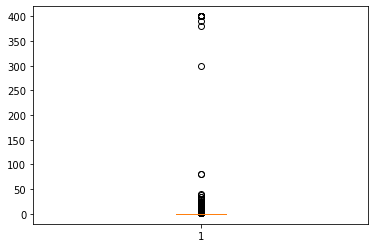

In [63]:
plt.boxplot(inp1.Price)
plt.show()

In [65]:
inp1 = inp1[inp1.Price<200]

<AxesSubplot:>

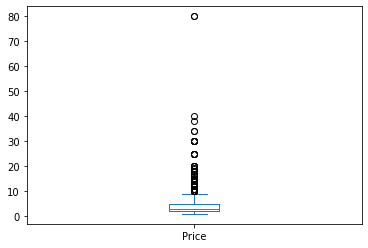

In [71]:
inp1[inp1.Price>0].Price.plot.box()

In [72]:
inp1 = inp1[inp1.Price<=30]

In [138]:
inp1.shape

(9334, 13)

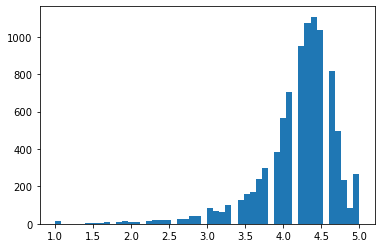

In [129]:
plt.hist(inp1.Rating,bins =50)
plt.show()

<AxesSubplot:ylabel='Frequency'>

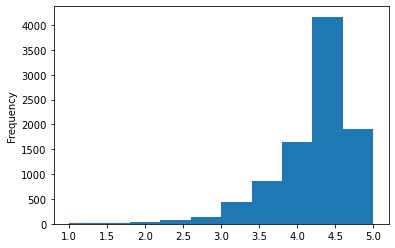

In [130]:
inp1.Rating.plot.hist()

In [77]:
import warnings
warnings.filterwarnings('ignore')

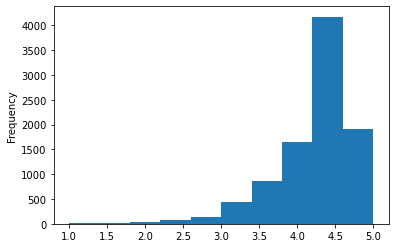

In [78]:
inp1.Rating.plot.hist()
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='Density'>

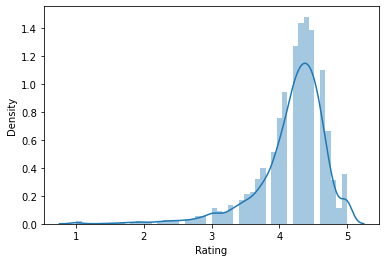

In [79]:
import seaborn as sns

sns.distplot(inp1.Rating)

<AxesSubplot:xlabel='Rating'>

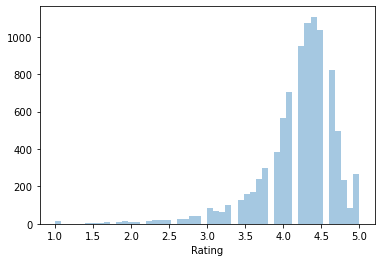

In [80]:
sns.distplot(inp1.Rating,kde = False)

<AxesSubplot:xlabel='Density', ylabel='Rating'>

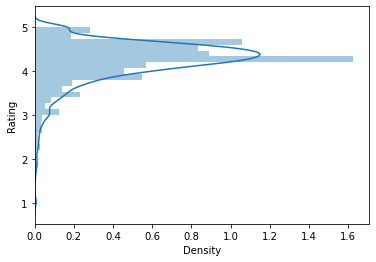

In [94]:
sns.distplot(inp1.Rating,bins=30,vertical = True)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

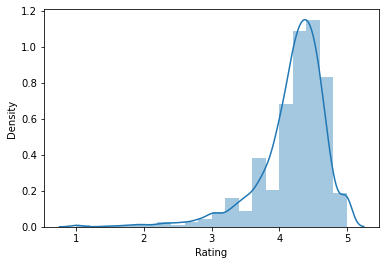

In [95]:
sns.distplot(inp1.Rating,bins=20)

Text(0.5, 1.0, 'Distribution of App Rating')

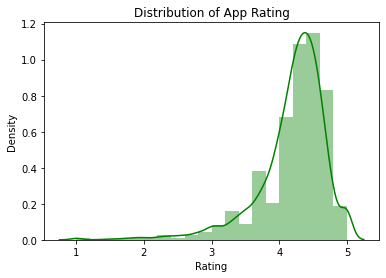

In [97]:
sns.distplot(inp1.Rating,bins=20,color='g')
plt.title('Distribution of App Rating',fontsize = '12')

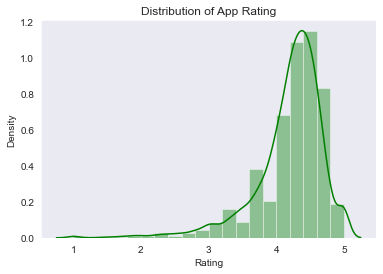

In [100]:
sns.set_style('dark')
sns.distplot(inp1.Rating,bins=20,color='g')
plt.title('Distribution of App Rating',fontsize = '12')
plt.show()

In [101]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

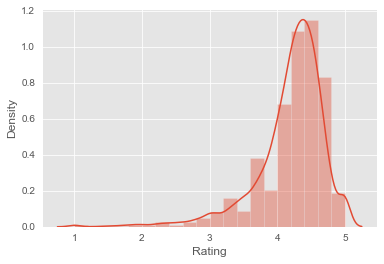

In [107]:
plt.style.use('ggplot')
sns.distplot(inp1.Rating,bins = 20)
plt.show()

In [108]:
plt.style.use('dark_background')

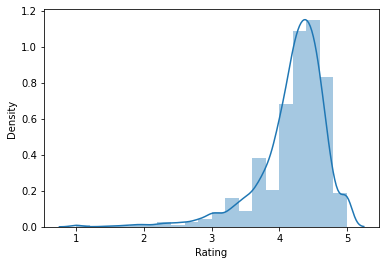

In [131]:
sns.distplot(inp1.Rating,bins = 20)
plt.show()

In [111]:
plt.style.use('default')
%matplotlib inline

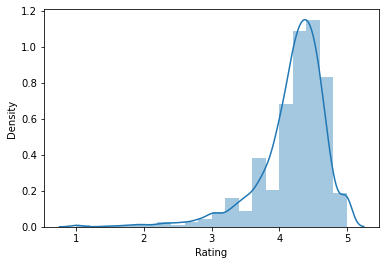

In [112]:
sns.distplot(inp1.Rating,bins = 20)
plt.show()

In [137]:
inp1['Content Rating'].value_counts()

Everyone        7394
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [135]:
#inp1[(inp1['Content Rating'] == 'Adults only 18+') | (inp1['Content Rating'] =='Unrated')]
inp1 = inp1[~inp1['Content Rating'].isin(['Adults only 18+','Unrated'])]

In [136]:
inp1.shape

(9334, 13)

<AxesSubplot:ylabel='Content Rating'>

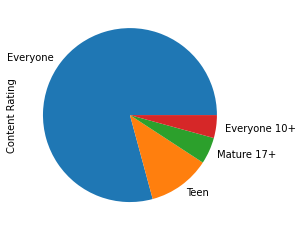

In [143]:
inp1['Content Rating'].value_counts().plot.pie()

<AxesSubplot:>

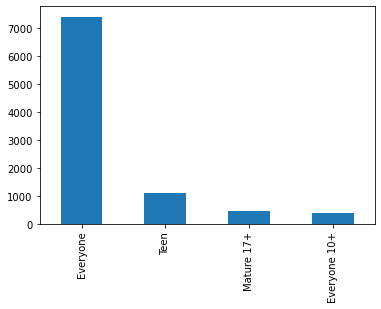

In [139]:
inp1['Content Rating'].value_counts().plot.bar()

<AxesSubplot:>

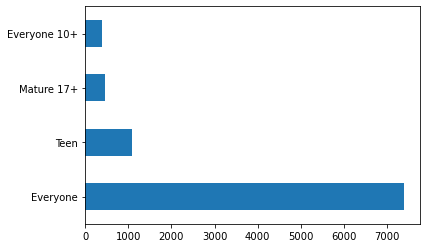

In [145]:
inp1['Content Rating'].value_counts().plot.barh()

In [142]:
inp1['Content Rating'].value_counts().barplot()

AttributeError: 'Series' object has no attribute 'barplot'

<AxesSubplot:>

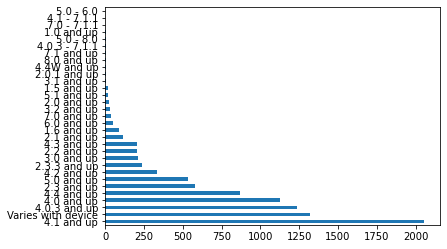

In [146]:
inp1['Android Ver'].value_counts().plot.barh()

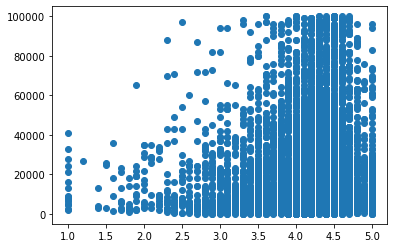

In [148]:
plt.scatter(inp1['Rating'],inp1['Size'])

AttributeError: 'PathCollection' object has no property 'kde'

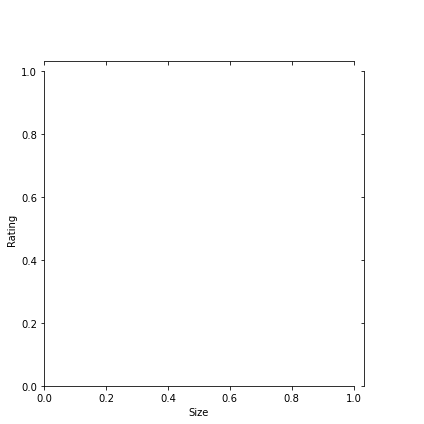

In [151]:
sns.jointplot(inp1['Size'],inp1['Rating'],kde = False)

In [152]:
### Rating vs Price

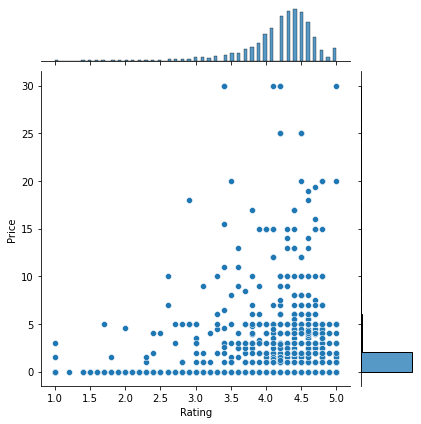

In [ ]:
sns.jointplot(inp1['Rating'],inp1['Price'])

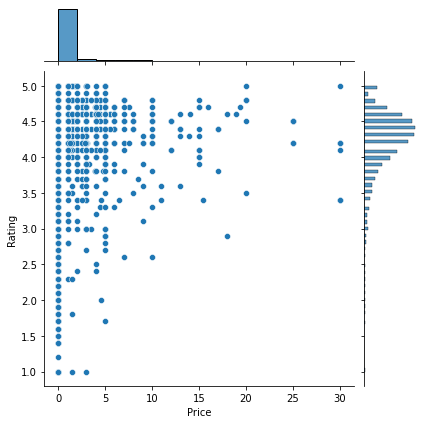

In [154]:
sns.jointplot(inp1['Price'],inp1['Rating'])

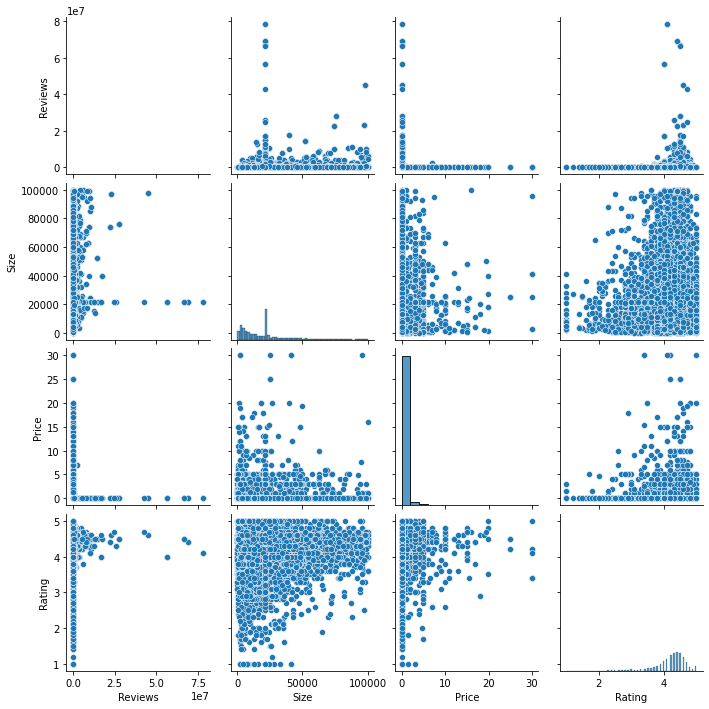

In [159]:
sns.pairplot(inp1[['Reviews','Size','Price','Rating']])
plt.show()

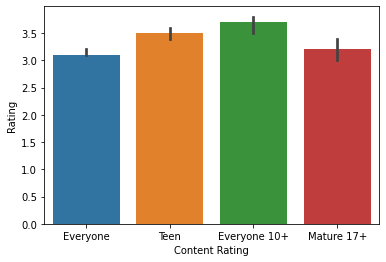

In [160]:
sns.barplot(data = inp1,x = 'Content Rating', y= 'Rating',estimator = lambda x:np.quantile(x,0.05))
plt.show()

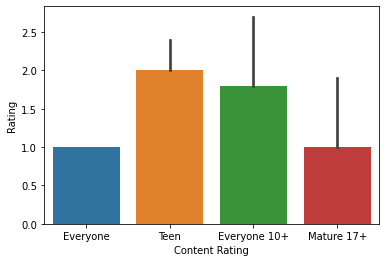

In [163]:
sns.barplot(data = inp1,x = 'Content Rating', y= 'Rating',estimator = lambda x:np.quantile(x,0))
plt.show()

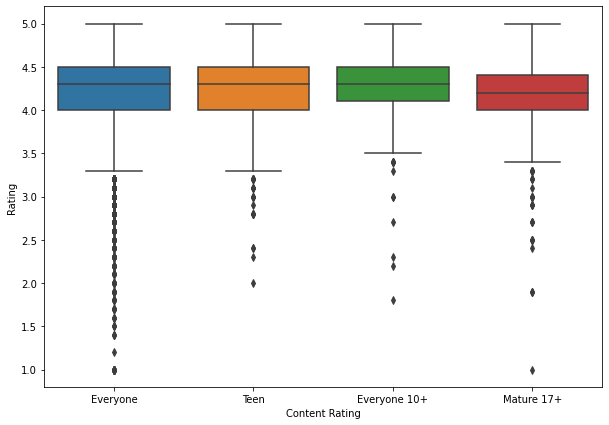

In [166]:

plt.figure(figsize=[10,7])
sns.boxplot(inp1['Content Rating'],inp1['Rating'])
plt.show()

<AxesSubplot:xlabel='Rating'>

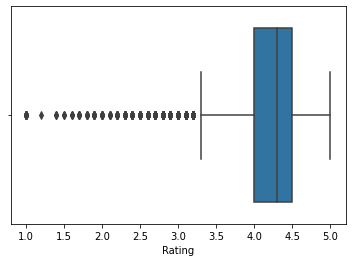

In [167]:
sns.boxplot(inp1['Rating'])

In [176]:
inp1['Genres'].value_counts()

Tools                      732
Entertainment              529
Education                  468
Action                     358
Productivity               351
                          ... 
Parenting;Brain Games        1
Card;Brain Games             1
Tools;Education              1
Entertainment;Education      1
Strategy;Creativity          1
Name: Genres, Length: 115, dtype: int64

In [184]:
inp2 = inp1[inp1['Genres'].isin(['Tools','Entertainment','Education','Action'])]

inp2

In [185]:
inp2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
700,TED,EDUCATION,4.6,181893,18000.0,10000000,Free,0.0,Everyone 10+,Education,"July 27, 2018",3.2.5,4.1 and up
701,English Communication - Learn English for Chin...,EDUCATION,4.7,2544,18000.0,100000,Free,0.0,Everyone,Education,"December 29, 2017",3.1,4.0 and up
702,Khan Academy,EDUCATION,4.6,85375,21000.0,5000000,Free,0.0,Everyone,Education,"July 27, 2018",5.0.0,4.1 and up
703,Learn English with Wlingua,EDUCATION,4.7,314299,3300.0,10000000,Free,0.0,Everyone,Education,"May 2, 2018",1.94.9,4.0 and up
706,Learn Spanish - Español,EDUCATION,4.7,32346,3200.0,1000000,Free,0.0,Everyone,Education,"December 18, 2017",1.3.8,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8600.0,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13000.0,5000,Free,0.0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


<AxesSubplot:xlabel='Genres', ylabel='Rating'>

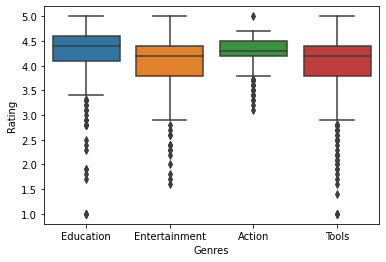

In [186]:
sns.boxplot(inp2['Genres'],inp2['Rating'])

In [2]:
inp1

NameError: name 'inp1' is not defined

### Summary of Google play store case study

First, you did a fair bit of data handling and cleaning - cleaning junk records, adding missing values, changing data types, remove outliers, etc.
When you analysed the ratings using the histogram, you saw that they are skewed towards higher ratings.
Using a bar chart, you saw that most of the apps belong to the Everyone category.
You also observed a weak trend between the ratings and the size of the app, using a scatter-plot. You also briefly forayed to reg plots to understand its nuances.
Using a pair-plot, you were able to see multiple scatter plots and draw several inferences, for example, price and rating having very weak trend, reviews and price being inversely related and so on.
After that, you utilised estimator functions along with bar plots as well as box plots to observe the spread of ratings across the different Content Rating Categories. Here, your main observation was that Everyone category has a lot of apps having very low ratings.
Finally, you created a heat map comparing the ratings across different Reviews and Content Rating buckets.